<a href="https://colab.research.google.com/github/ahui-ops/road_to_pytorch2/blob/main/Simple_Neural_Network_(IRIS_model).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Create a Model Class that inherits nn.Module
class Model(nn.Module):
  # input layer( 4 feature of flower)
  # -> Hidden layer1( number of neurons )
  # -> H2 (n)
  # -> output (3 classes of iris flowers)
  def __init__(self, in_features = 4, h1=8, h2=9, out_features=3):   # construct the function
      super().__init__()                         # instantiate nn.Module
      self.fc1 = nn.Linear(in_features,h1) # fc: fully connect
      self.fc2 = nn.Linear(h1, h2)
      self.out = nn.Linear(h2,out_features)

  def forward(self,x):
    x = F.relu(self.fc1(x)) # RELU: rectified linear unit = max(0,output)
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x

In [26]:
# pick a manual seed for randomization
torch.manual_seed(32)

# create an instance of model
model = Model()

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
# display plots directly below the cell
%matplotlib inline

url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [31]:
# change the 'variety' frm string to number
my_df['variety']= my_df['variety'].replace('Setosa',0.0)
my_df['variety']= my_df['variety'].replace('Versicolor',1.0)
my_df['variety']= my_df['variety'].replace('Virginica',2.0)
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [32]:
# Split the features and label: set X,y
# Pls considered as spliting the questions and answers
X = my_df.drop('variety',axis = 1) # store everything into X (exclude the whole row of 'variety')
y = my_df['variety']

# Convert into numpy arrays
X = X.values
y = y.values

In [33]:
from sklearn.model_selection import train_test_split

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 32)

# Convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

# Convert y features to float tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

# Set criterion of model to measure the error, how far off the predictions are from the data
criterion = nn.CrossEntropyLoss()

# Choose Adam optimizer. lr: learning rate (if error doesn't go down after iterations (epochs), lower learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [34]:
# Training model
epoch = 500
losses = []
for i in range(epoch):
  y_pred = model.forward(X_train) # get predicted results
  loss = criterion(y_pred, y_train)  # measure the error: predicted value vs y_train
  losses.append(loss.detach().numpy())  # keep track of losses

  # print every 10 epoch
  if i%10 == 0:
    print(f'Epoch: {i} Loss: {loss}')

  # Do some back propagation: take the error rate of forward propagation and feed back
  # fine tune the weights thru the network
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 Loss: 1.1699321269989014
Epoch: 10 Loss: 0.9570867419242859
Epoch: 20 Loss: 0.7980871796607971
Epoch: 30 Loss: 0.6327950358390808
Epoch: 40 Loss: 0.43861737847328186
Epoch: 50 Loss: 0.290453165769577
Epoch: 60 Loss: 0.17780695855617523
Epoch: 70 Loss: 0.11584118008613586
Epoch: 80 Loss: 0.0893637090921402
Epoch: 90 Loss: 0.07752915471792221
Epoch: 100 Loss: 0.07132721692323685
Epoch: 110 Loss: 0.06751003116369247
Epoch: 120 Loss: 0.06487806886434555
Epoch: 130 Loss: 0.06290554255247116
Epoch: 140 Loss: 0.06134176254272461
Epoch: 150 Loss: 0.06004921719431877
Epoch: 160 Loss: 0.05894488841295242
Epoch: 170 Loss: 0.05797586962580681
Epoch: 180 Loss: 0.05710809305310249
Epoch: 190 Loss: 0.056319523602724075
Epoch: 200 Loss: 0.05559544637799263
Epoch: 210 Loss: 0.054925817996263504
Epoch: 220 Loss: 0.05430304631590843
Epoch: 230 Loss: 0.05372174084186554
Epoch: 240 Loss: 0.053177252411842346
Epoch: 250 Loss: 0.05266518518328667
Epoch: 260 Loss: 0.05218225717544556
Epoch: 270 Loss:

Text(0.5, 0, 'Epoch')

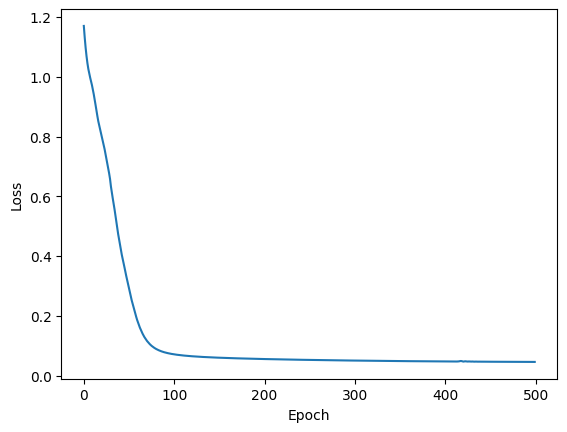

In [35]:
# Graph the loss
plt.plot(range(epoch),losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [39]:
# Evaluate Model on Test Data Set
with torch.no_grad(): # turn-off back propagation
  y_eval = model.forward(X_test) # y_eval: prediction
  loss = criterion(y_eval, y_test) # find the loss or error

loss


tensor(0.0255)

In [53]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    if(y_test[i] == 0): x = "Setosa"
    elif(y_test[i] == 1): x = "Versicolor"
    else: x = "Virginica"

    print(f'{i+1}.) {str(y_val)} \t {x} \t {y_val.argmax().item()}') # the highest value represent which category it is
    if y_val.argmax().item() == y_test[i] :
      correct += 1

print(f'{correct} out of {len(y_test)}: {100*correct/len(y_test)}%')

1.) tensor([-5.4980,  7.4894,  0.5235]) 	 Versicolor 	 1
2.) tensor([ 11.7708,   2.5999, -16.7406]) 	 Setosa 	 0
3.) tensor([ 10.5404,   2.8793, -15.4364]) 	 Setosa 	 0
4.) tensor([-6.4148,  7.3453,  1.4638]) 	 Versicolor 	 1
5.) tensor([-11.7016,   5.0540,   8.4701]) 	 Virginica 	 2
6.) tensor([-14.3375,   5.0222,  10.9833]) 	 Virginica 	 2
7.) tensor([  9.6451,   3.3209, -14.5570]) 	 Setosa 	 0
8.) tensor([ 10.8672,   2.6990, -15.7048]) 	 Setosa 	 0
9.) tensor([-5.3965,  7.5148,  0.2960]) 	 Versicolor 	 1
10.) tensor([ 11.3317,   2.6435, -16.2336]) 	 Setosa 	 0
11.) tensor([-6.6978,  7.8759,  1.5005]) 	 Versicolor 	 1
12.) tensor([-14.1577,   3.1825,  12.0329]) 	 Virginica 	 2
13.) tensor([-1.9348,  7.2980, -2.9221]) 	 Versicolor 	 1
14.) tensor([-2.0043,  7.9891, -3.3940]) 	 Versicolor 	 1
15.) tensor([-12.2219,   4.4695,   9.2743]) 	 Virginica 	 2
16.) tensor([-12.9747,   3.2983,  10.8122]) 	 Virginica 	 2
17.) tensor([-6.2919,  6.8231,  1.7207]) 	 Versicolor 	 1
18.) tensor([-10.5

In [54]:
new_iris = torch.tensor([5.3,6.7,1.3,4.0])
with torch.no_grad():
  print(model(new_iris))

tensor([ 3.1538,  4.3387, -7.2285])


In [62]:
newer_iris = torch.tensor([5.9,3.0,5.1,1.8])
with torch.no_grad():
  print(model(newer_iris))

tensor([-10.9041,   4.7370,   7.7662])


In [63]:
# Save NN model
torch.save(model.state_dict(), 'iris_model1.pt')

In [64]:
# Load the saved model
new_model = Model()
new_model.load_state_dict(torch.load('iris_model1.pt'))

<All keys matched successfully>

In [65]:
# Making sure model loaded correctly
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)